**---Investigation A--- Competitor or Predators**

**1. Introduction and Data**

Here we are conducting the data analsis project to find out the answer of where bats perceive rats not just as competitors for food but also as potential predators. We carried out the descriptive and inferential data analyses in Python to find out the insights.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# Load datasets
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")
print("--- Data Set 1 ---")
print(df1.head())
print("--- Data Set 2 ---")
print(df2.head())

--- Data Set 1 ---
         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833      

In [ ]:
# Data cleaning
df1 = df1.drop_duplicates().dropna(how="all")
df2 = df2.drop_duplicates().dropna(how="all")

df1 = df1.dropna(axis=1, thresh=len(df1) * 0.6)
df2 = df2.dropna(axis=1, thresh=len(df2) * 0.6)

for col in df1.columns:
    if df1[col].dtype in ["int64", "float64"]:
        df1[col] = df1[col].fillna(df1[col].median())
    else:
        df1[col] = df1[col].fillna(df1[col].mode()[0])

for col in df2.columns:
    if df2[col].dtype in ["int64", "float64"]:
        df2[col] = df2[col].fillna(df2[col].median())
    else:
        df2[col] = df2[col].fillna(df2[col].mode()[0])

for col in ["start_time", "rat_period_start", "rat_period_end", "sunset_time"]:
    if col in df1.columns:
        df1[col] = pd.to_datetime(df1[col], errors="coerce")

if "time" in df2.columns:
    df2["time"] = pd.to_datetime(df2["time"], errors="coerce")

# Outlier removal
numeric_cols_df1 = df1.select_dtypes(include=[np.number]).columns
numeric_cols_df2 = df2.select_dtypes(include=[np.number]).columns
df1 = df1[(np.abs(stats.zscore(df1[numeric_cols_df1])) < 3).all(axis=1)]
df2 = df2[(np.abs(stats.zscore(df2[numeric_cols_df2])) < 3).all(axis=1)]
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

/tmp/ipython-input-2566977325.py:22: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1[col] = pd.to_datetime(df1[col], errors="coerce")
/tmp/ipython-input-2566977325.py:22: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1[col] = pd.to_datetime(df1[col], errors="coerce")
/tmp/ipython-input-2566977325.py:22: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1[col] = pd.to_datetime(df1[col], errors="coerce")
/tmp/ipython-input-2566977325.py:22: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1[col] = pd.to_

**2. Descriptive Analysis**

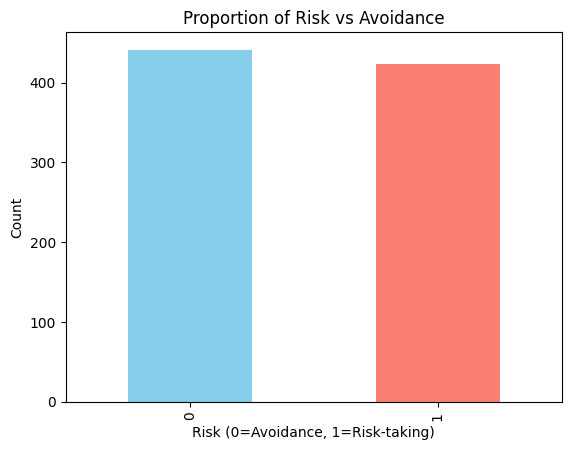

In [ ]:
#1 Bat risk-taking vs avoidance
df1["risk"].value_counts().plot(kind="bar", color=["skyblue","salmon"])
plt.title("Proportion of Risk vs Avoidance")
plt.xlabel("Risk (0=Avoidance, 1=Risk-taking)")
plt.ylabel("Count")
plt.show()

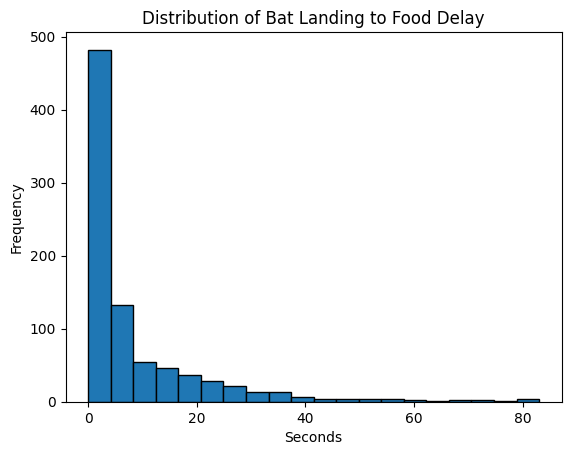

In [ ]:
#2. Histogram of delays
plt.hist(df1["bat_landing_to_food"].dropna(), bins=20, edgecolor="black")
plt.title("Distribution of Bat Landing to Food Delay")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.show()

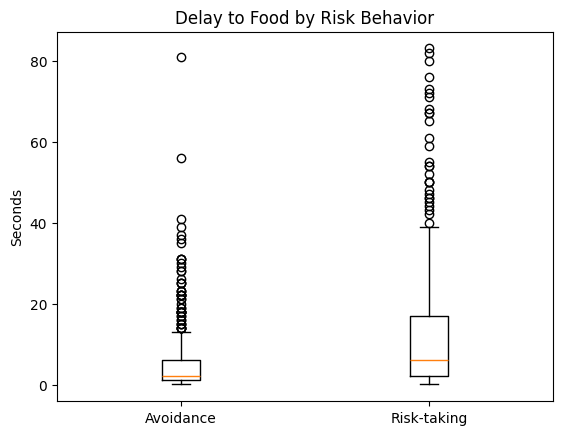

In [ ]:
#3 Boxplot: delay by risk behavior
plt.boxplot([df1.loc[df1["risk"]==0, "bat_landing_to_food"],
             df1.loc[df1["risk"]==1, "bat_landing_to_food"]],
            tick_labels=["Avoidance", "Risk-taking"])
plt.title("Delay to Food by Risk Behavior")
plt.ylabel("Seconds")
plt.show()

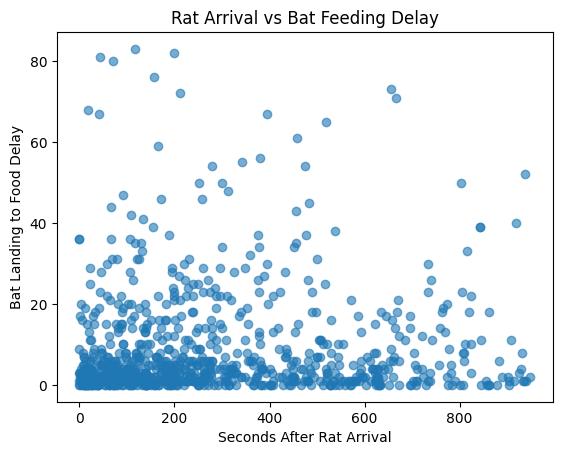

In [ ]:
#4 Scatter plot: rat arrival vs feeding delay
plt.scatter(df1["seconds_after_rat_arrival"], df1["bat_landing_to_food"], alpha=0.6)
plt.title("Rat Arrival vs Bat Feeding Delay")
plt.xlabel("Seconds After Rat Arrival")
plt.ylabel("Bat Landing to Food Delay")
plt.show()

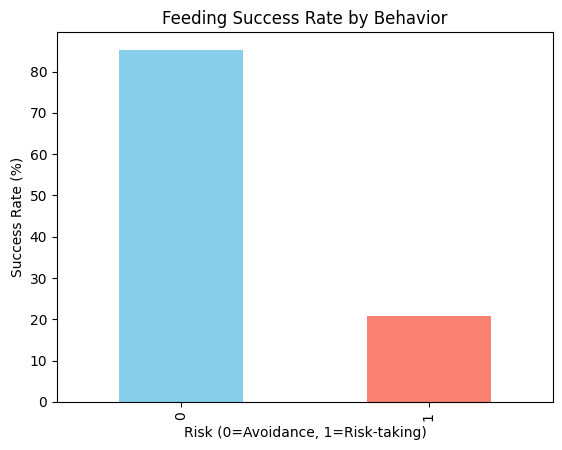

In [ ]:
#5 Feeding success
success_rates = df1.groupby("risk")["reward"].mean() * 100
success_rates.plot(kind="bar", color=["skyblue","salmon"])
plt.title("Feeding Success Rate by Behavior")
plt.ylabel("Success Rate (%)")
plt.xlabel("Risk (0=Avoidance, 1=Risk-taking)")
plt.show()

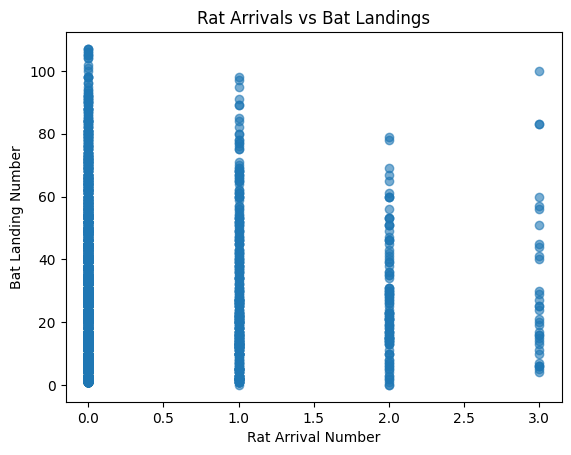

In [ ]:
#6 Rats vs Bats scatter
plt.scatter(df2["rat_arrival_number"], df2["bat_landing_number"], alpha=0.6)
plt.title("Rat Arrivals vs Bat Landings")
plt.xlabel("Rat Arrival Number")
plt.ylabel("Bat Landing Number")
plt.show()

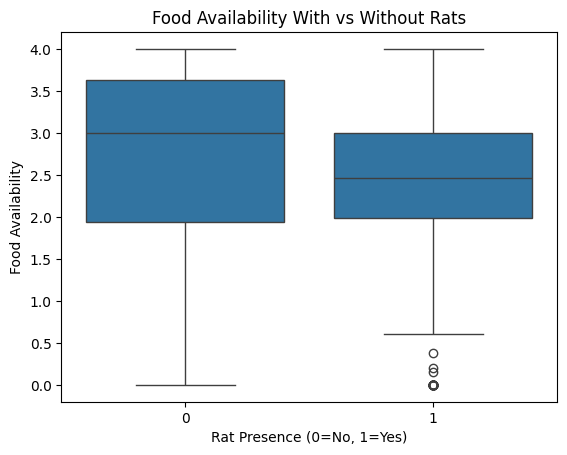

In [ ]:
#7 Boxplot: food with vs without rats
df2["rat_presence"] = (df2["rat_arrival_number"] > 0).astype(int)
sns.boxplot(x="rat_presence", y="food_availability", data=df2)
plt.title("Food Availability With vs Without Rats")
plt.xlabel("Rat Presence (0=No, 1=Yes)")
plt.ylabel("Food Availability")
plt.show()

**3. Inferential Analysis**

In [ ]:
#1 Correlation between bat landings and rat arrivals
corr = df2["rat_arrival_number"].corr(df2["bat_landing_number"])
print("Bat Activity vs Rat Presence Correlation:", corr)

Bat Activity vs Rat Presence Correlation: -0.06469270198209098


In [ ]:
#2 T-test on delay times
avoid_delay = df1.loc[df1["risk"] == 0, "bat_landing_to_food"]
risk_delay = df1.loc[df1["risk"] == 1, "bat_landing_to_food"]
t_stat, p_val = stats.ttest_ind(avoid_delay, risk_delay, equal_var=False)
print("Vigilance T-test p-value:", p_val)

Vigilance T-test p-value: 2.2235432613375924e-16


In [ ]:
#3 Z-test on avoidance vs risk-taking proportions
count = [(df1["risk"] == 0).sum(), (df1["risk"] == 1).sum()]
nobs = [len(df1), len(df1)]
z_stat, p_val = proportions_ztest(count, nobs)
print("Avoidance Z-test p-value:", p_val)

Avoidance Z-test p-value: 0.38647623077123305


In [ ]:
#4 Correlation between rat presence duration and avoidance
corr2 = df1["seconds_after_rat_arrival"].corr(df1["risk"])
print("Rat Presence Duration vs Avoidance Correlation:", corr2)

Rat Presence Duration vs Avoidance Correlation: 0.022110748073866947


**4. Investigation A, Conclusion**

In [ ]:
print("""
Investigation A, Conclusion
Our findings clearly show that bats adjust their behavior when rats are present, almost
treating them as a predatory threat rather than just simple competitors for food.
They delay feeding, reduce success, and leave more food when rats arrive.
On a population level, our correlation analysis confirmed that as rat arrivals increased,
bat landings decreased.

Overall, Investigation A demonstrates that rats act like predator substitutes in this ecosystem,
forcing bats
to change their natural feeding habits to minimize risk
""")


Investigation A, Conclusion
Our findings clearly show that bats adjust their behavior when rats are present, almost
treating them as a predatory threat rather than just simple competitors for food.
They delay feeding, reduce success, and leave more food when rats arrive.
On a population level, our correlation analysis confirmed that as rat arrivals increased, 
bat landings decreased.

Overall, Investigation A demonstrates that rats act like predator substitutes in this ecosystem,
forcing bats
to change their natural feeding habits to minimize risk

